# Purpose of this notebook

This notebook is used to visualise the features from the numpy arrays extracted by extract_arrays.ipynb. It is not required in the data processing pipeline.

In [1]:
import pandas as pd
import numpy as np
import datetime as dt
from sklearn.preprocessing import LabelBinarizer
from matplotlib import pyplot as plt
import random

In [2]:
FEATURES_PATH = "data/my_20_sec_features-additional_sites-2022_07_24__17_28_44.npy"
LABELS_PATH = "data/my_20_sec_labels-additional_sites-2022_07_24__17_28_44.npy"

SEED = 42

In [3]:
with open(FEATURES_PATH, 'rb') as f:
    features = np.load(f)

with open(LABELS_PATH, 'rb') as f:
    labels = np.load(f)

In [4]:
labels = [label if label[:4] == "www." else "Other" for label in labels]

In [5]:
(unique, counts) = np.unique(labels, return_counts=True)
frequencies = np.asarray((unique, counts)).T

frequencies

array([['Other', '1054'],
       ['www.amazon.co.uk', '220'],
       ['www.bbc.co.uk', '207'],
       ['www.ebay.co.uk', '240'],
       ['www.facebook.com', '233'],
       ['www.google.co.uk', '219'],
       ['www.google.com', '236'],
       ['www.twitter.com', '220'],
       ['www.uwe.ac.uk', '202'],
       ['www.wikipedia.com', '229'],
       ['www.youtube.com', '200']], dtype='<U21')

([<matplotlib.patches.Wedge at 0x13e8f76a0>,
 [Text(-1.0198305946023098, 0.6324124906365303, 'Other'),
  Text(-0.9386096680869972, -0.7476709777526589, 'www.amazon.co.uk'),
  Text(-0.5612091907009242, -1.0606810285249821, 'www.bbc.co.uk'),
  Text(-0.06703715653803591, -1.198126044973272, 'www.ebay.co.uk'),
  Text(0.467220933330363, -1.1053074682901156, 'www.facebook.com'),
  Text(0.8899659982051842, -0.8049599505805555, 'www.google.co.uk'),
  Text(1.1475281197923202, -0.3509689648471821, 'www.google.com'),
  Text(1.1878156433917384, 0.17056962600026598, 'www.twitter.com'),
  Text(1.0234702254823504, 0.6265051456700952, 'www.uwe.ac.uk'),
  Text(0.6836530116608103, 0.9862142564610918, 'www.wikipedia.com'),
  Text(0.22985369514804727, 1.1777806581986259, 'www.youtube.com')],
 [Text(-0.5949011801846806, 0.3689072862046426, '32.3%'),
  Text(-0.5475223063840816, -0.436141403689051, '6.7%'),
  Text(-0.3273720279088725, -0.6187305999729061, '6.3%'),
  Text(-0.03910500798052094, -0.698906859567

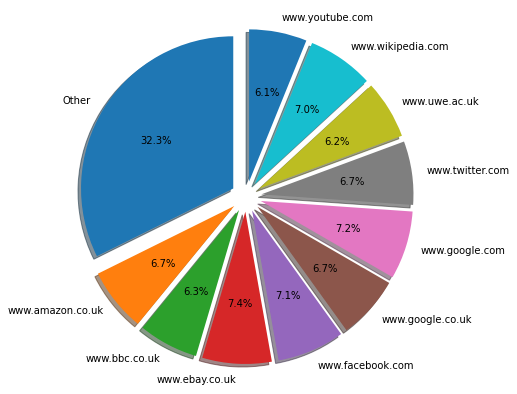

In [6]:
explode = [0.1] * len(frequencies[:,0])
plt.figure(figsize=(7,7))
plt.pie(frequencies[:,1], labels=frequencies[:,0], explode=explode, shadow=True, startangle=90, autopct='%1.1f%%')

In [7]:
max = features.max()
print(f"Max value: {max}")
features_scaled = features/max

Max value: 1278.0


(array([901., 524., 118., 139., 142., 190., 156., 159.,  94.,  71.,  48.,
         37.,  41.,  34.,  27.,  37.,  50.,  29.,  25.,  36.,  19.,  36.,
        196., 126.,   6.,  16.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,
          0.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   1.]),
 array([   2.  ,   27.52,   53.04,   78.56,  104.08,  129.6 ,  155.12,
         180.64,  206.16,  231.68,  257.2 ,  282.72,  308.24,  333.76,
         359.28,  384.8 ,  410.32,  435.84,  461.36,  486.88,  512.4 ,
         537.92,  563.44,  588.96,  614.48,  640.  ,  665.52,  691.04,
         716.56,  742.08,  767.6 ,  793.12,  818.64,  844.16,  869.68,
         895.2 ,  920.72,  946.24,  971.76,  997.28, 1022.8 , 1048.32,
        1073.84, 1099.36, 1124.88, 1150.4 , 1175.92, 1201.44, 1226.96,
        1252.48, 1278.  ]),
 <BarContainer object of 50 artists>)

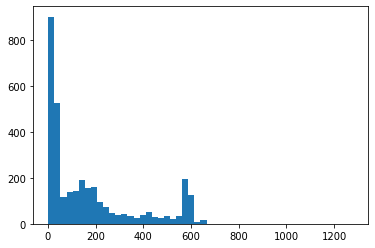

In [8]:
maxes = [arr.max() for arr in features]
plt.hist(maxes, bins=50)

In [9]:
unique_labels = np.unique(labels)

In [10]:
labels_df = pd.DataFrame(labels, columns=["label"])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

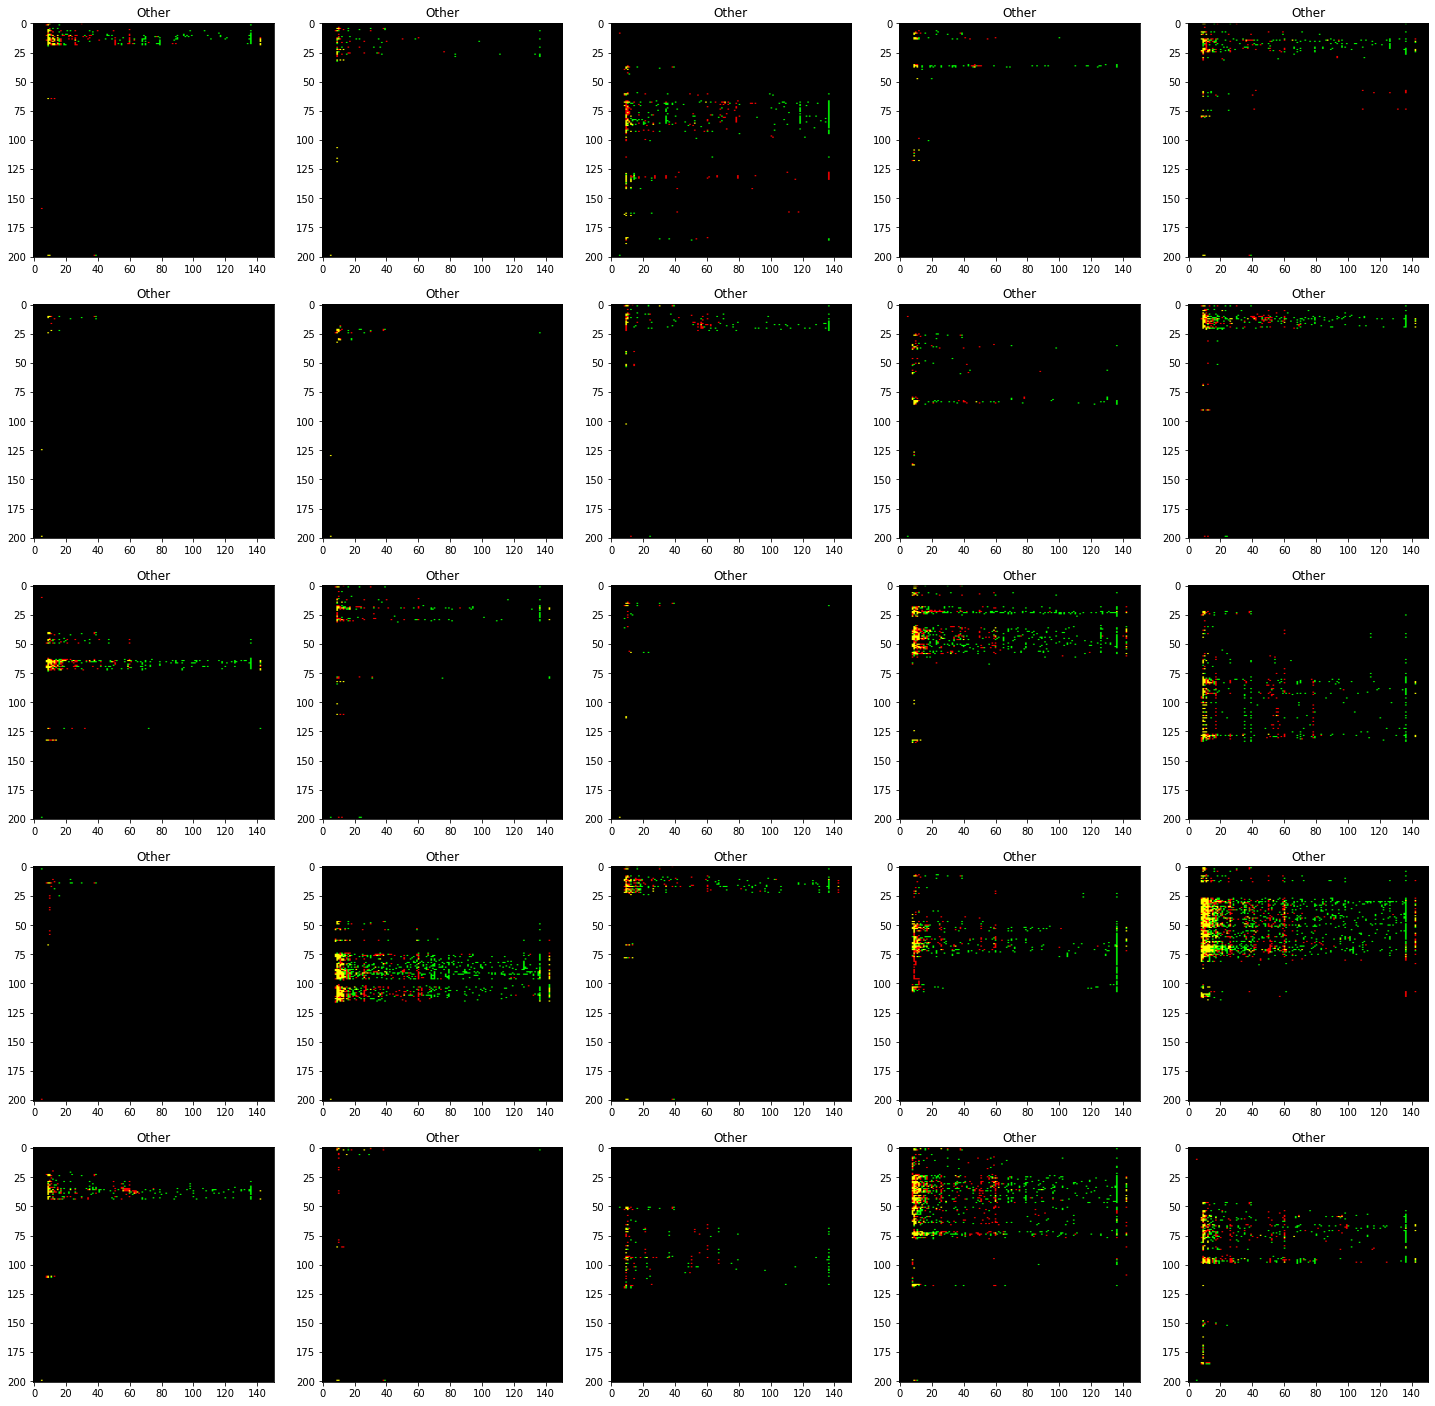

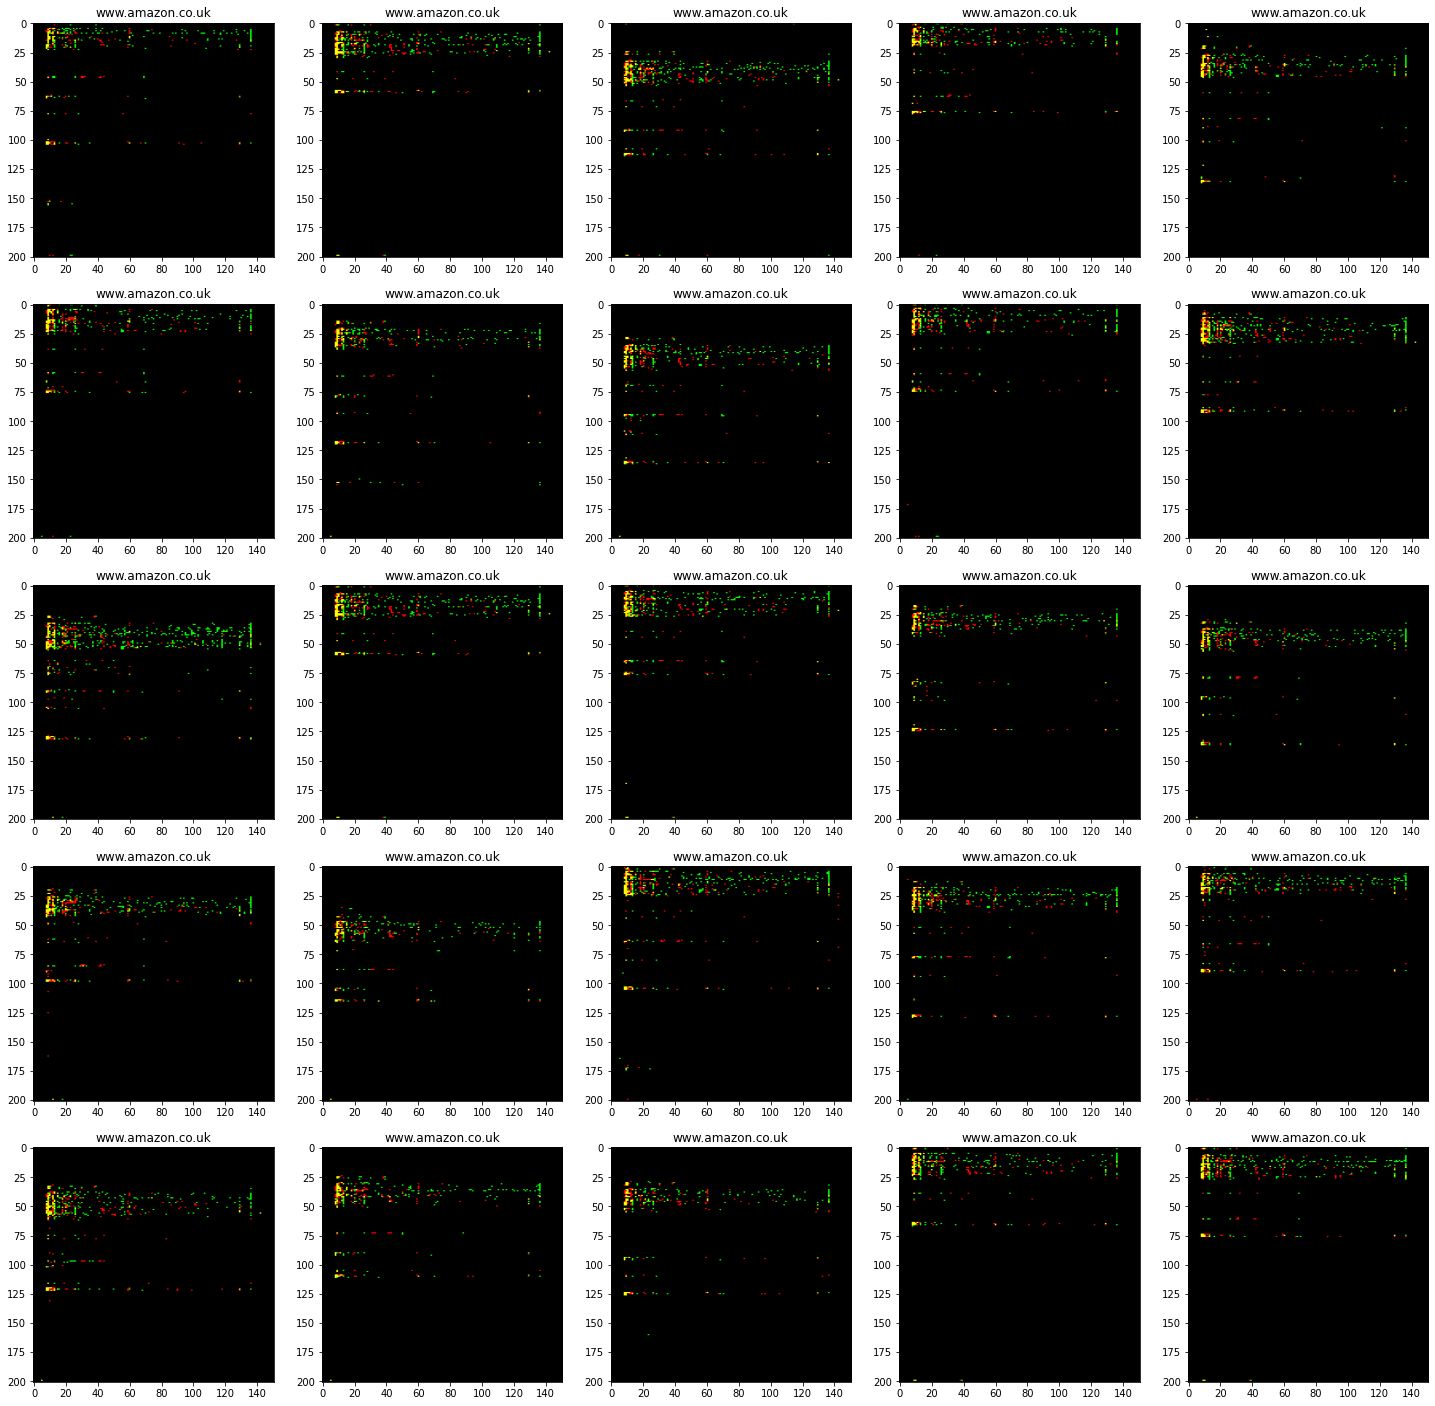

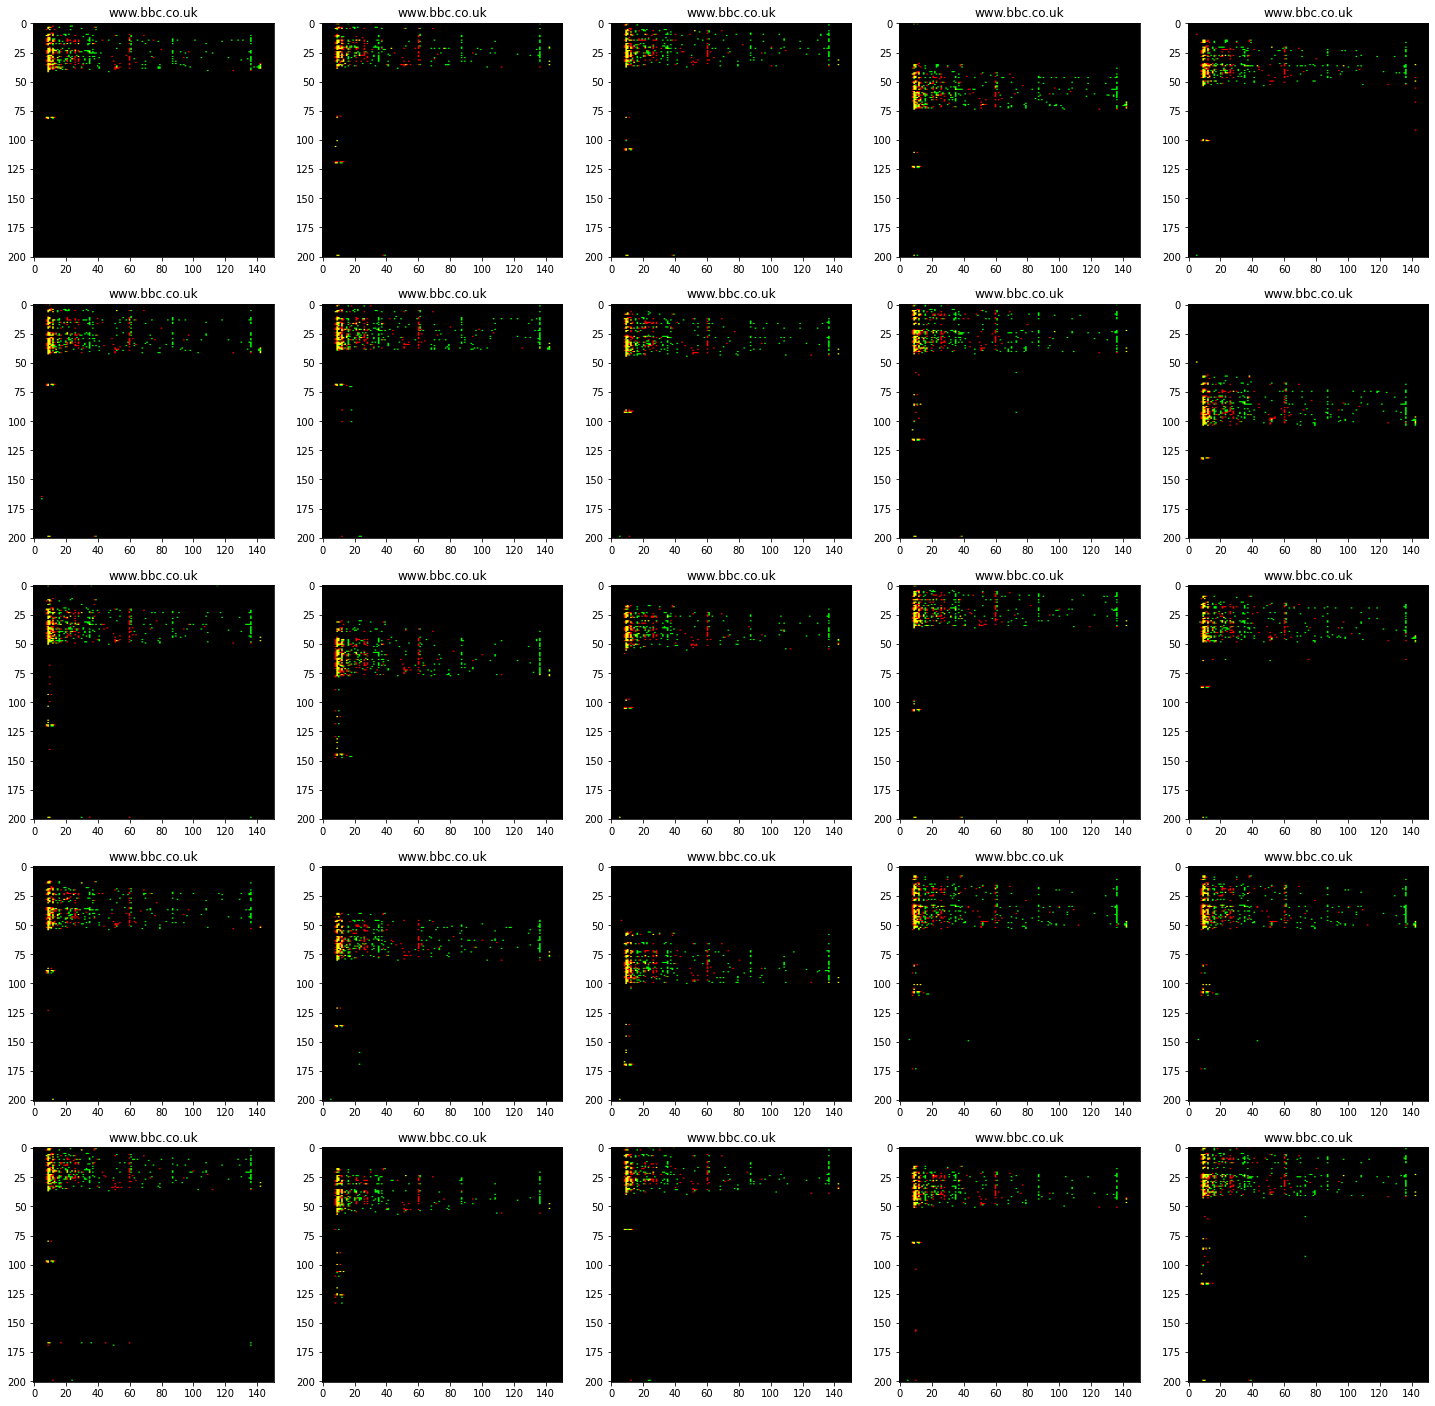

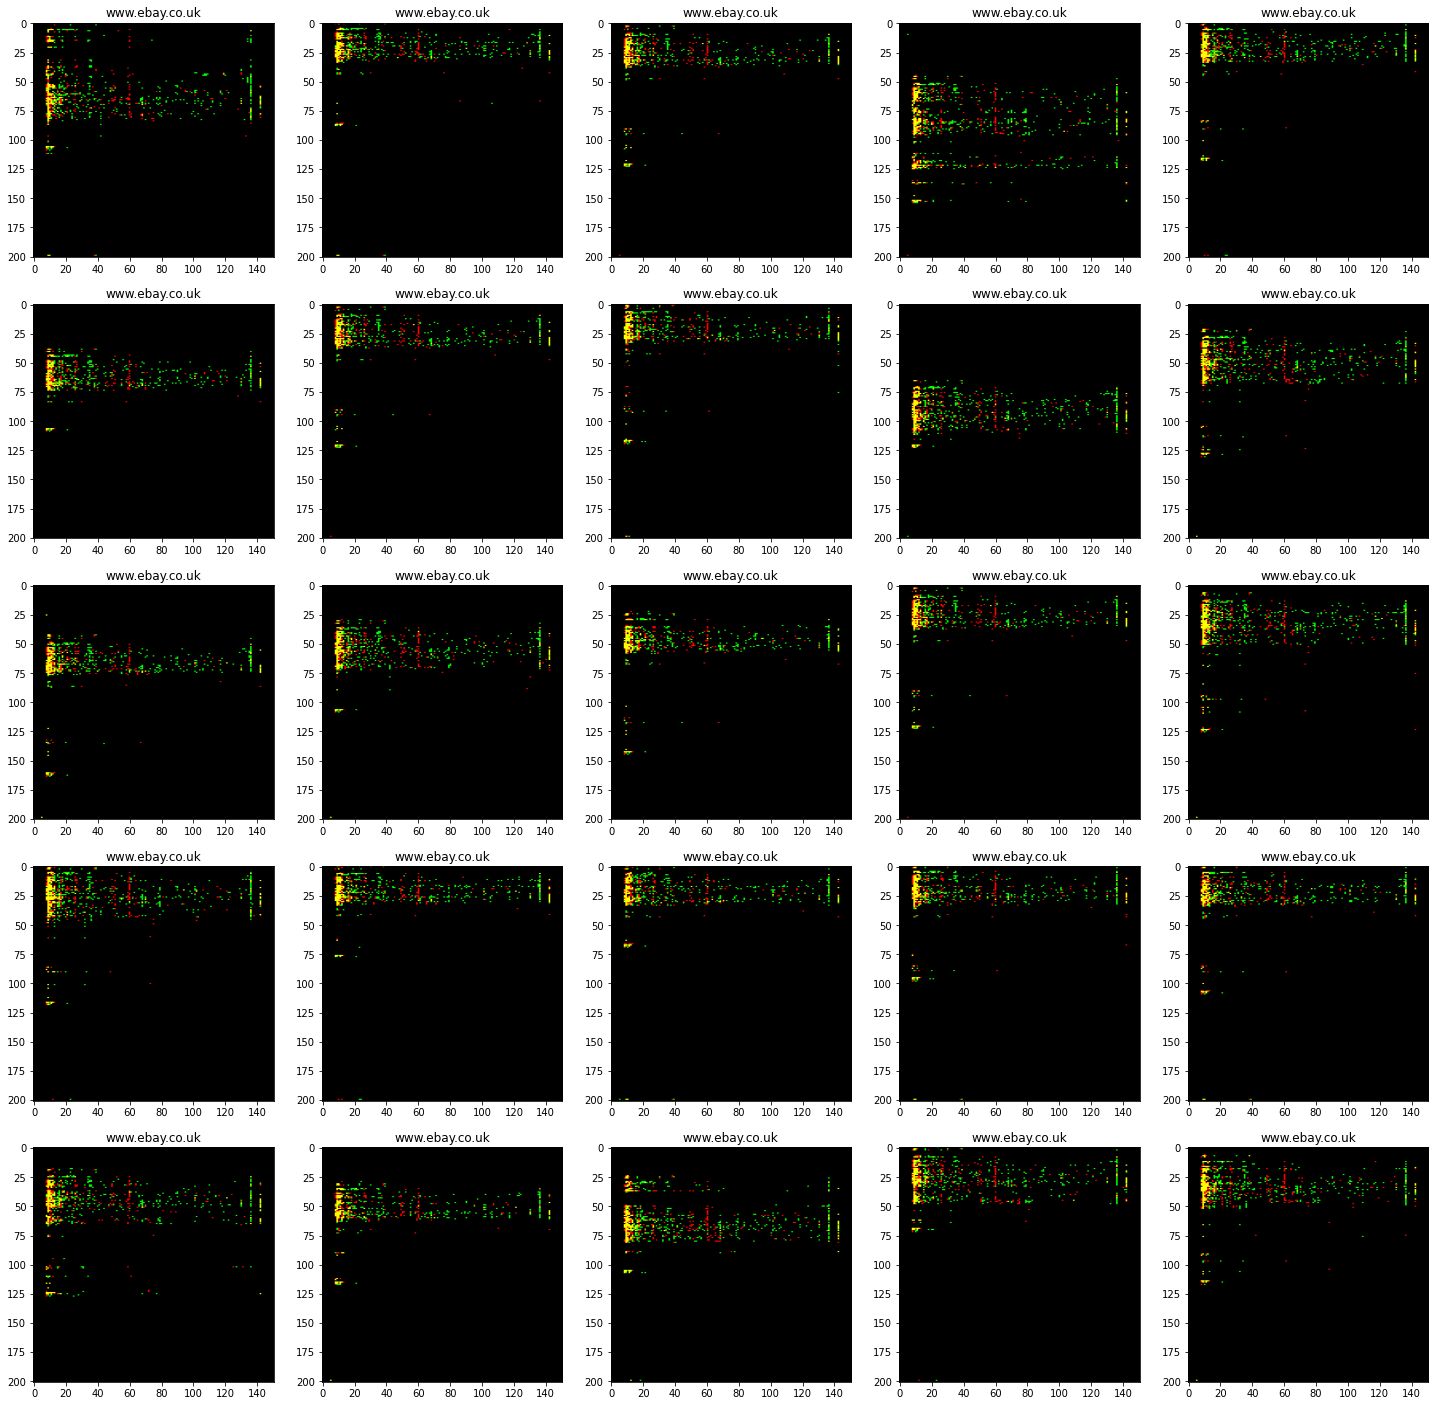

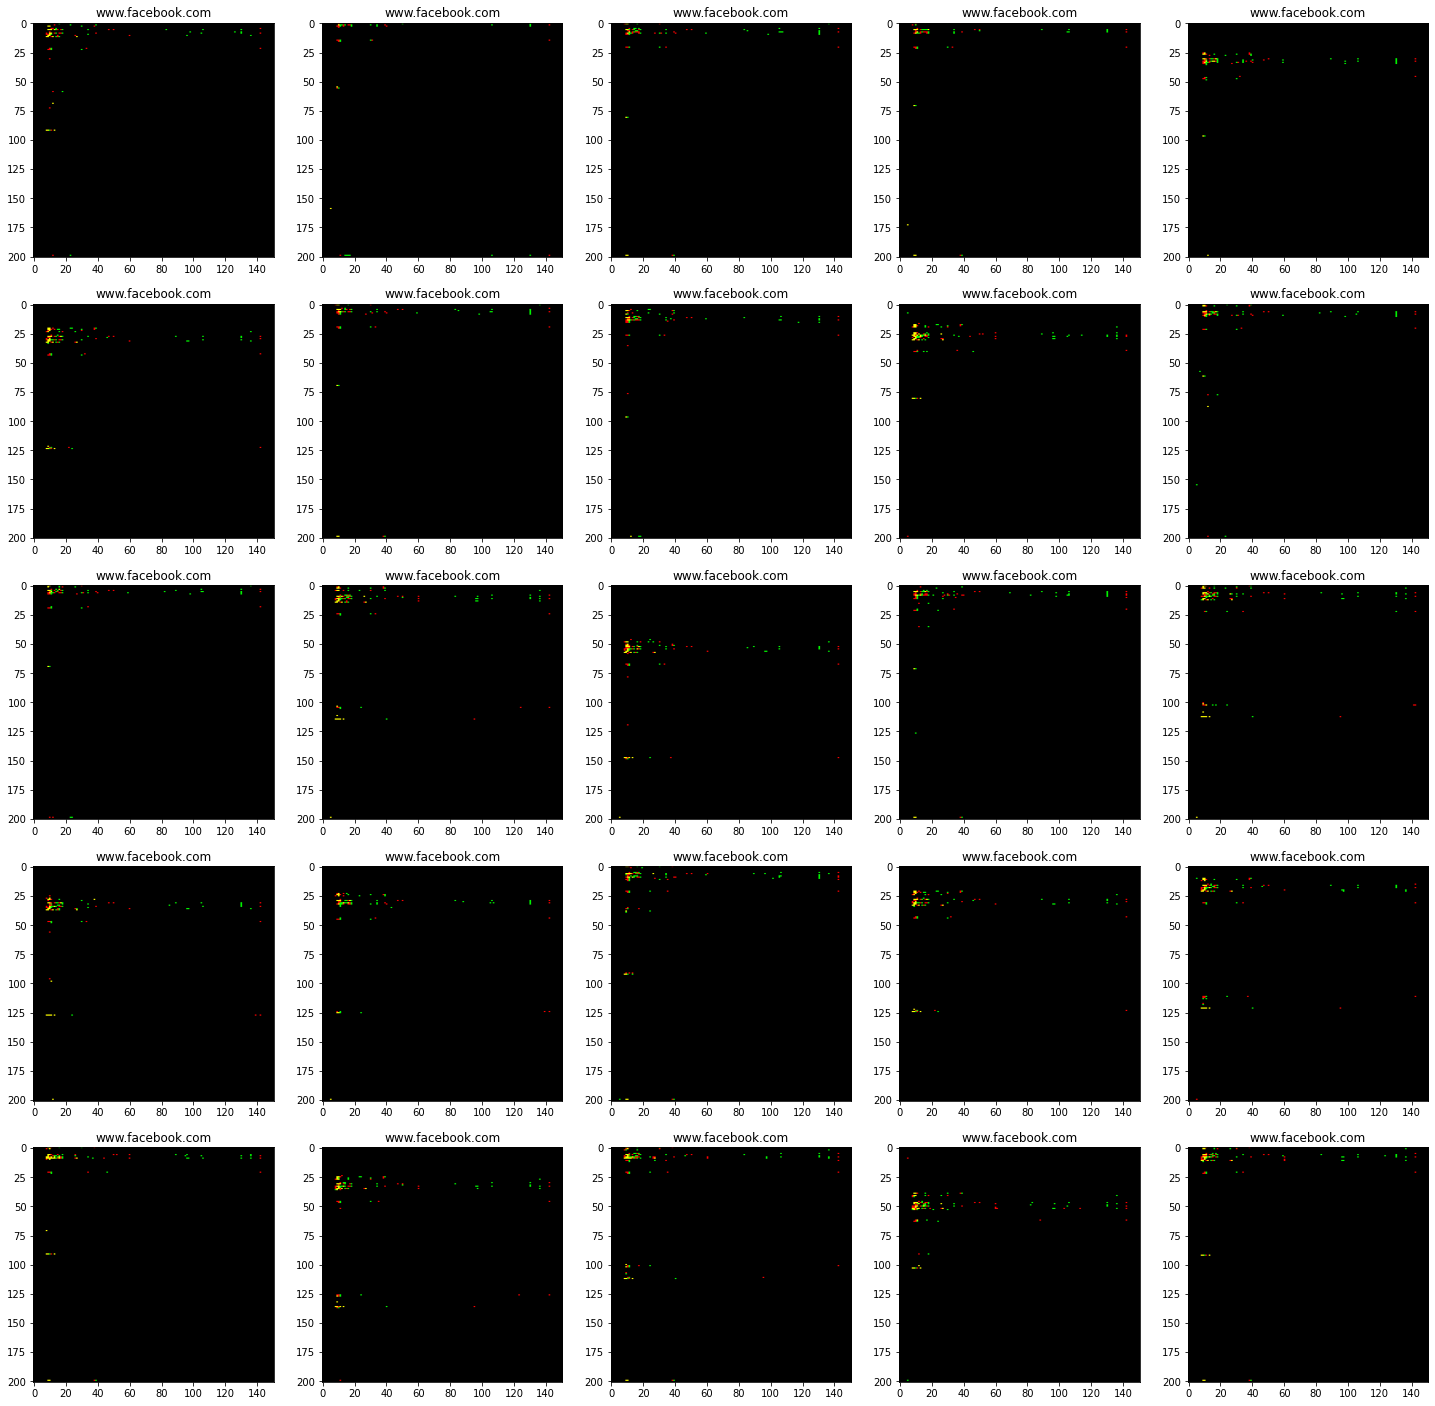

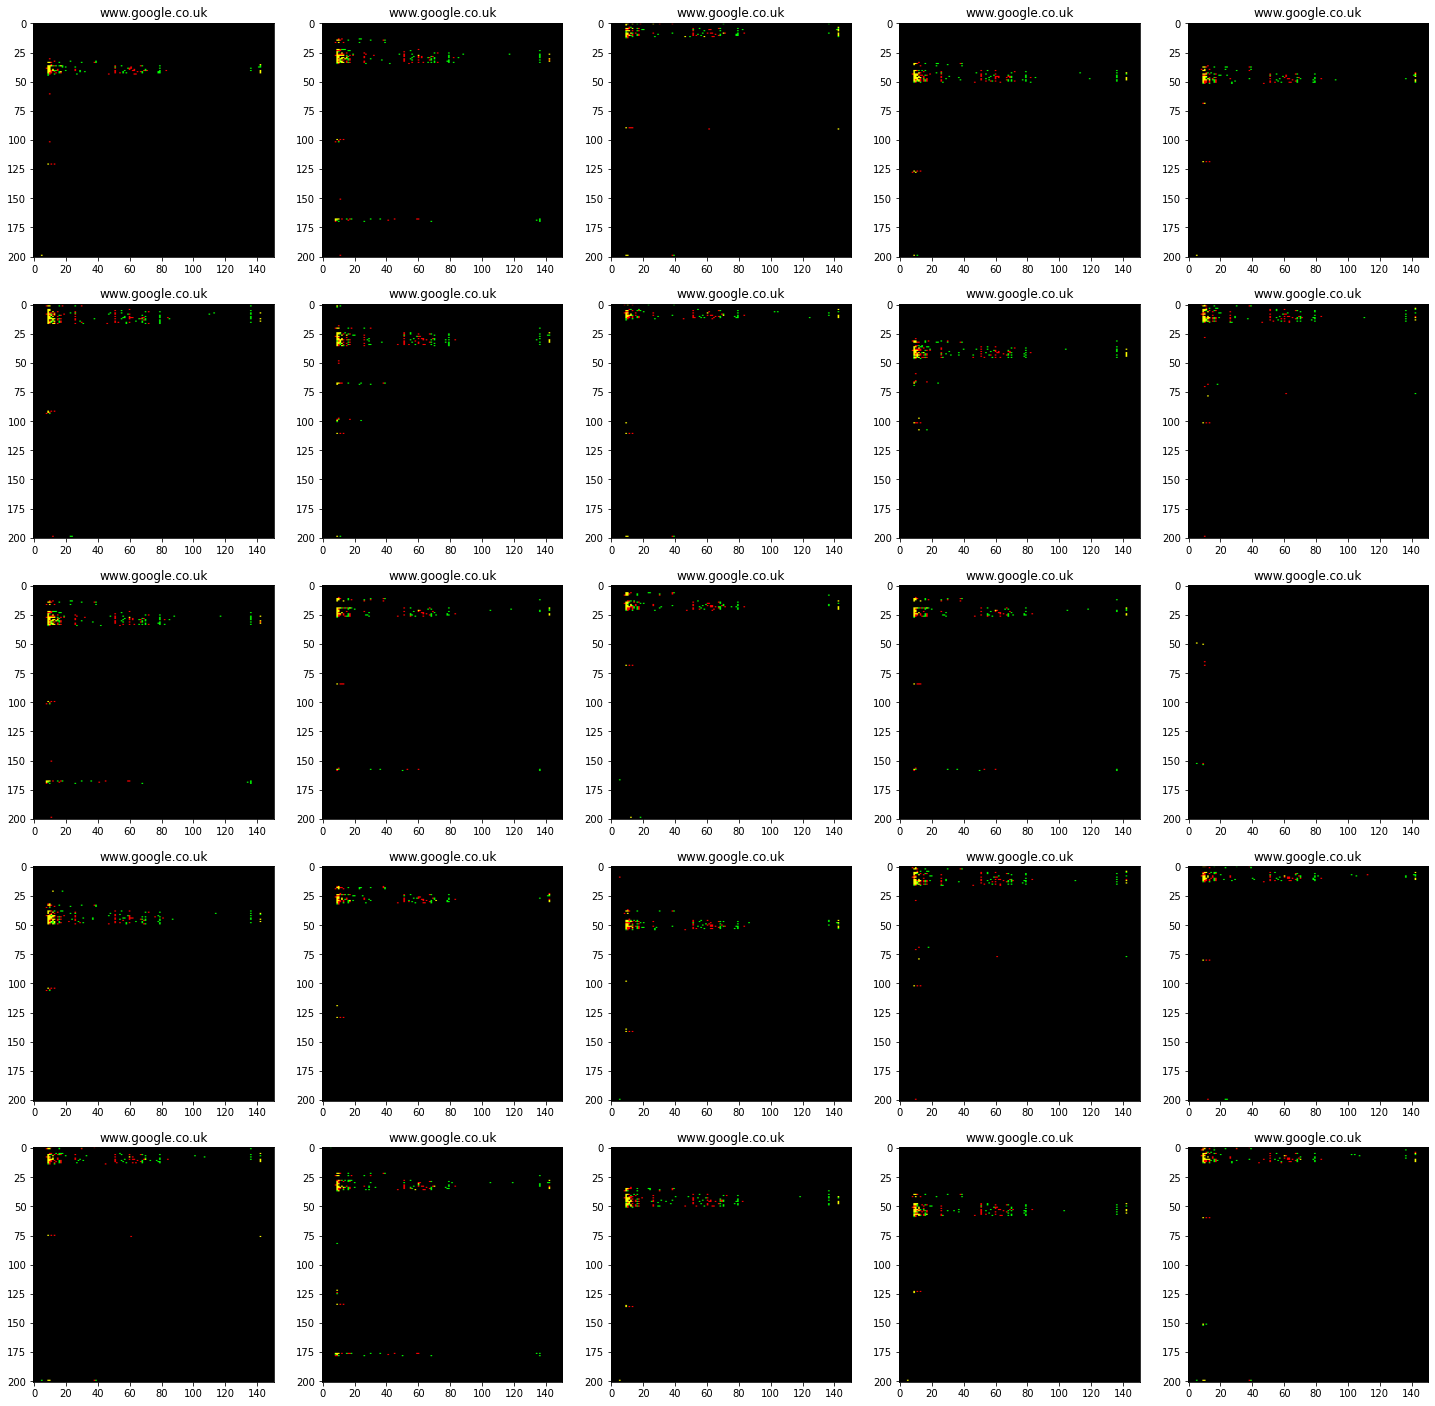

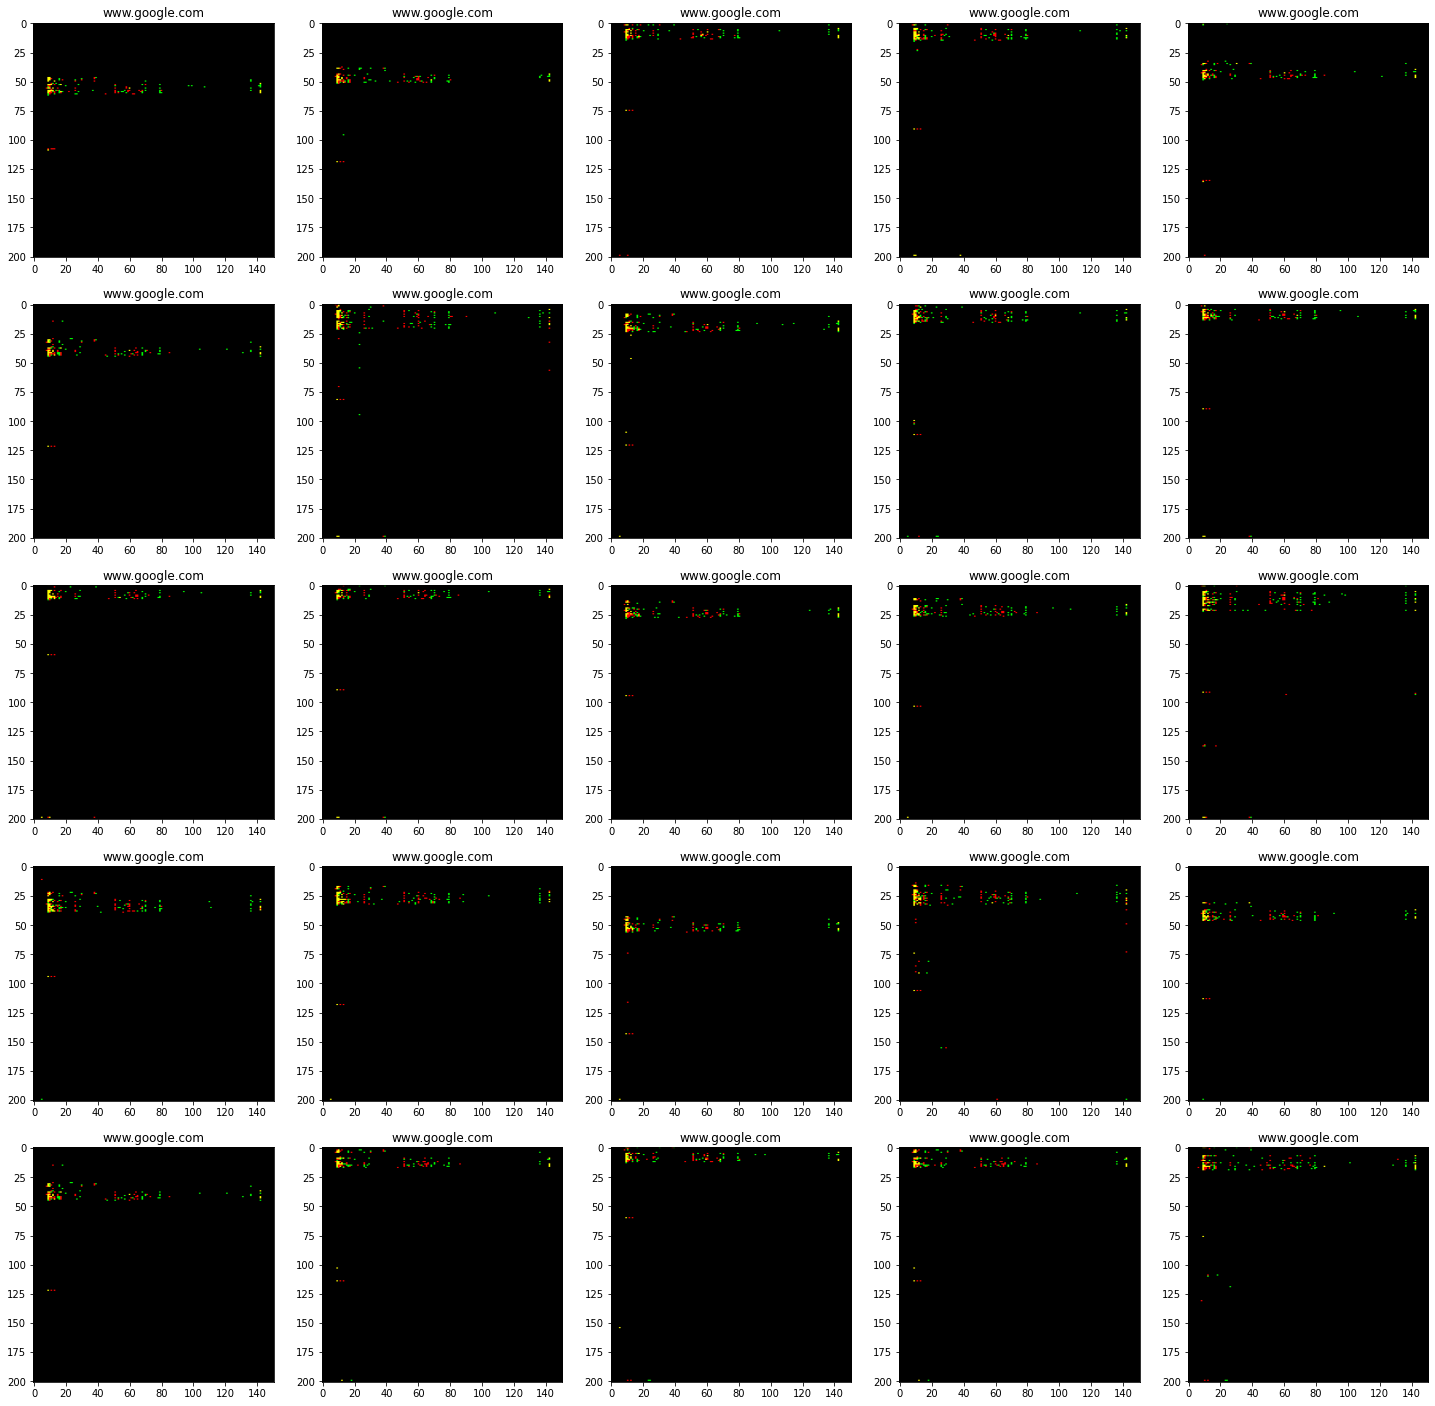

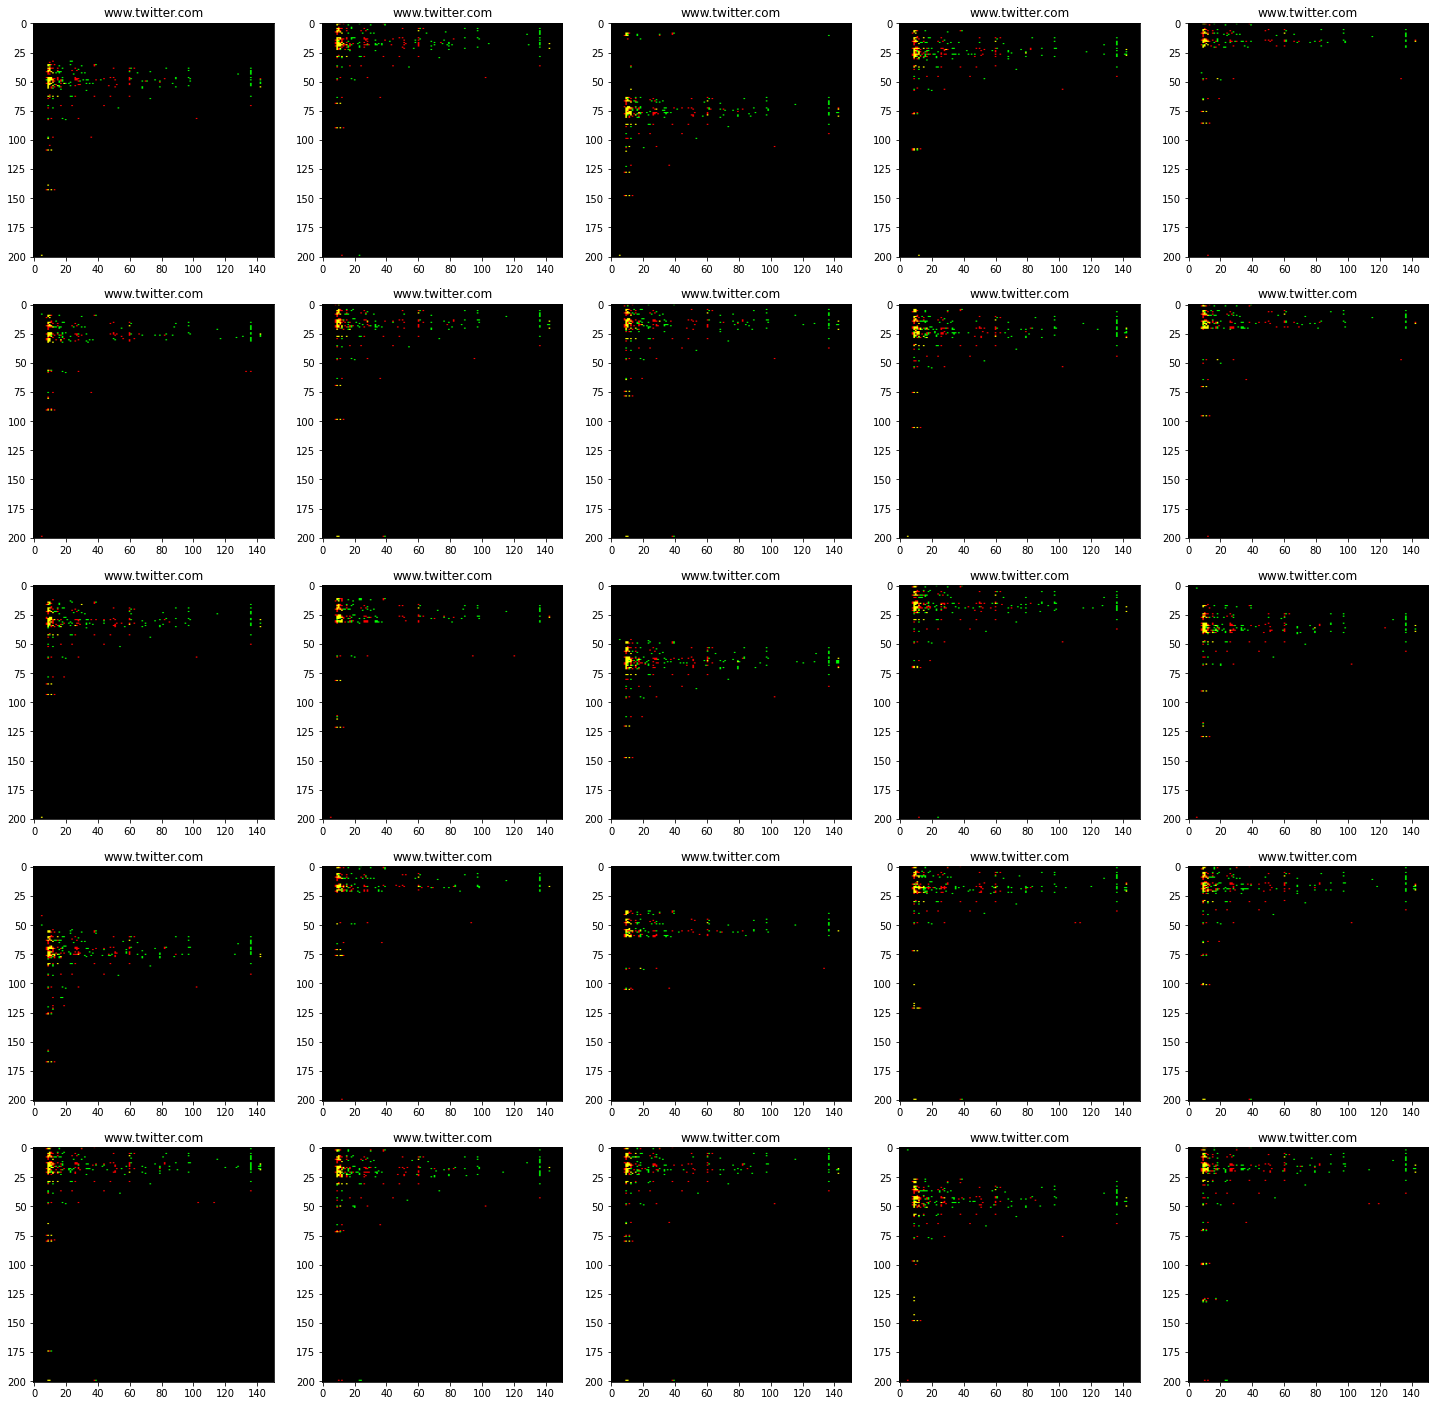

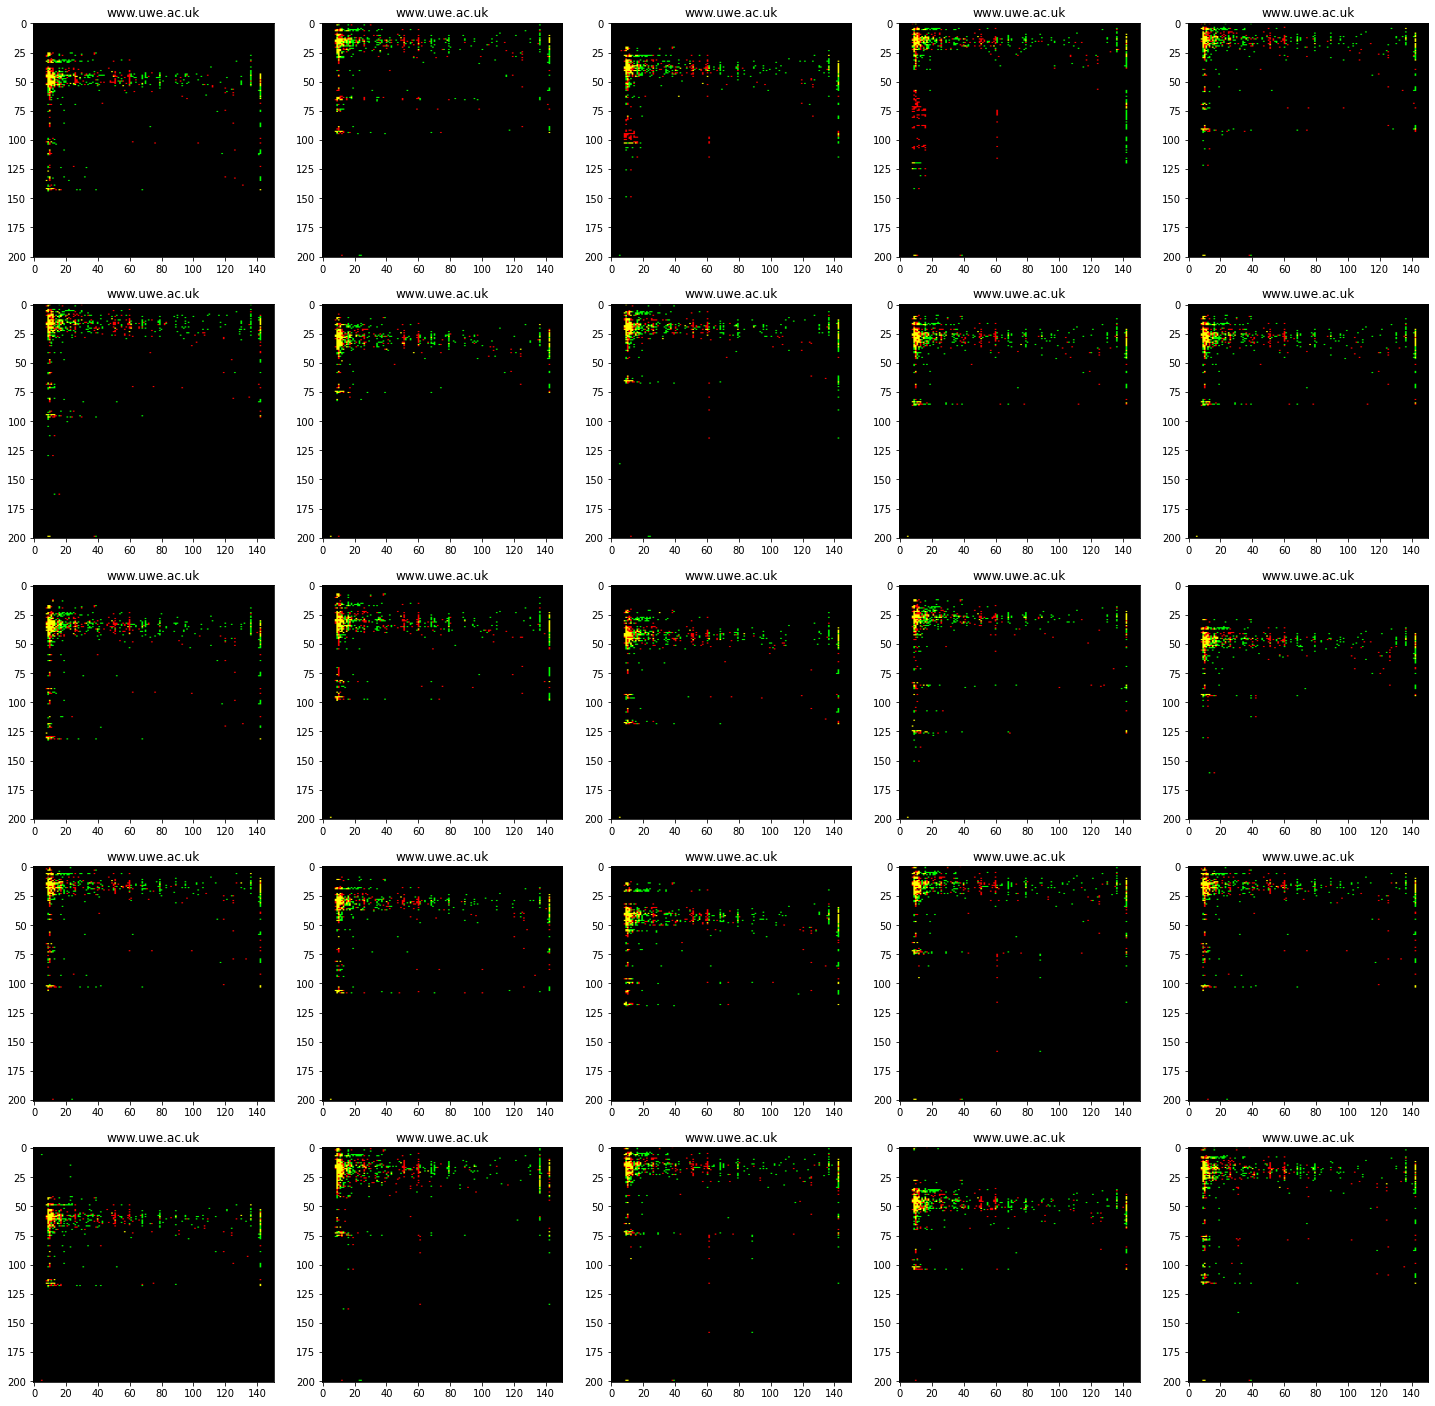

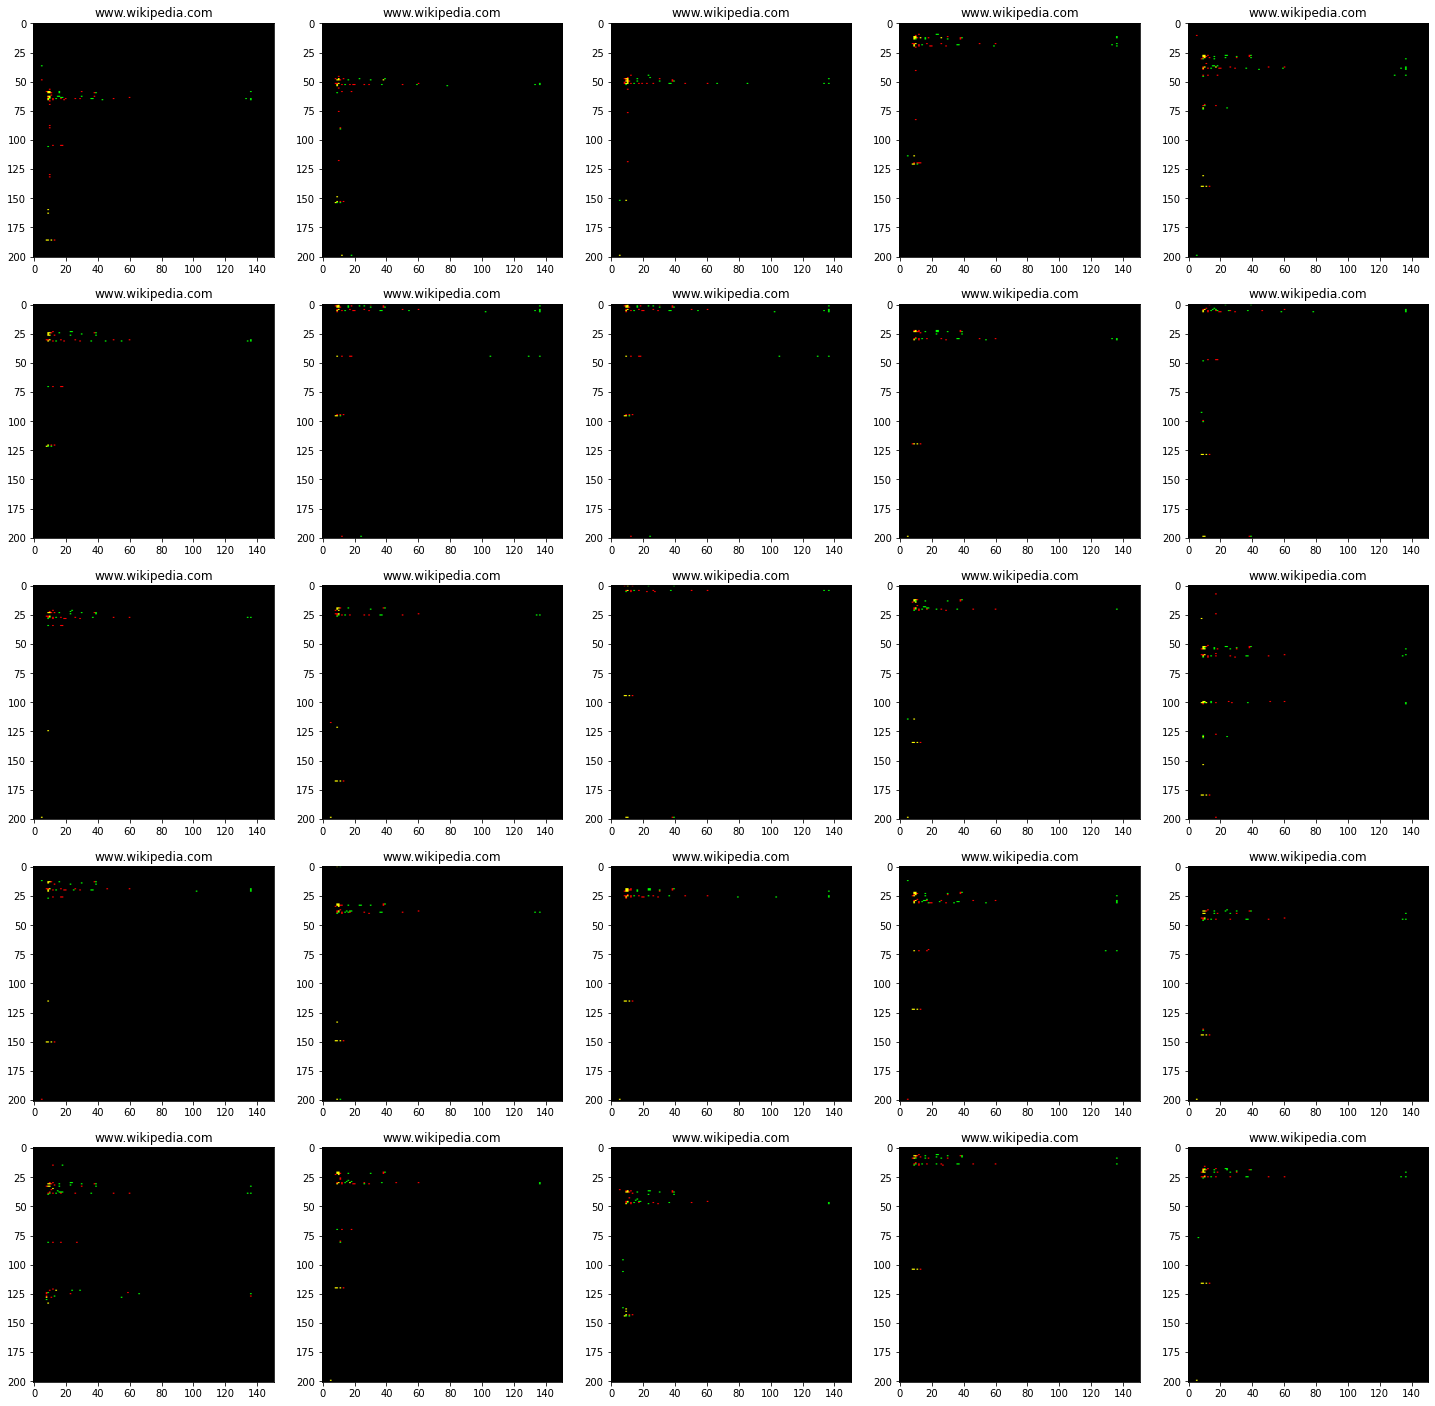

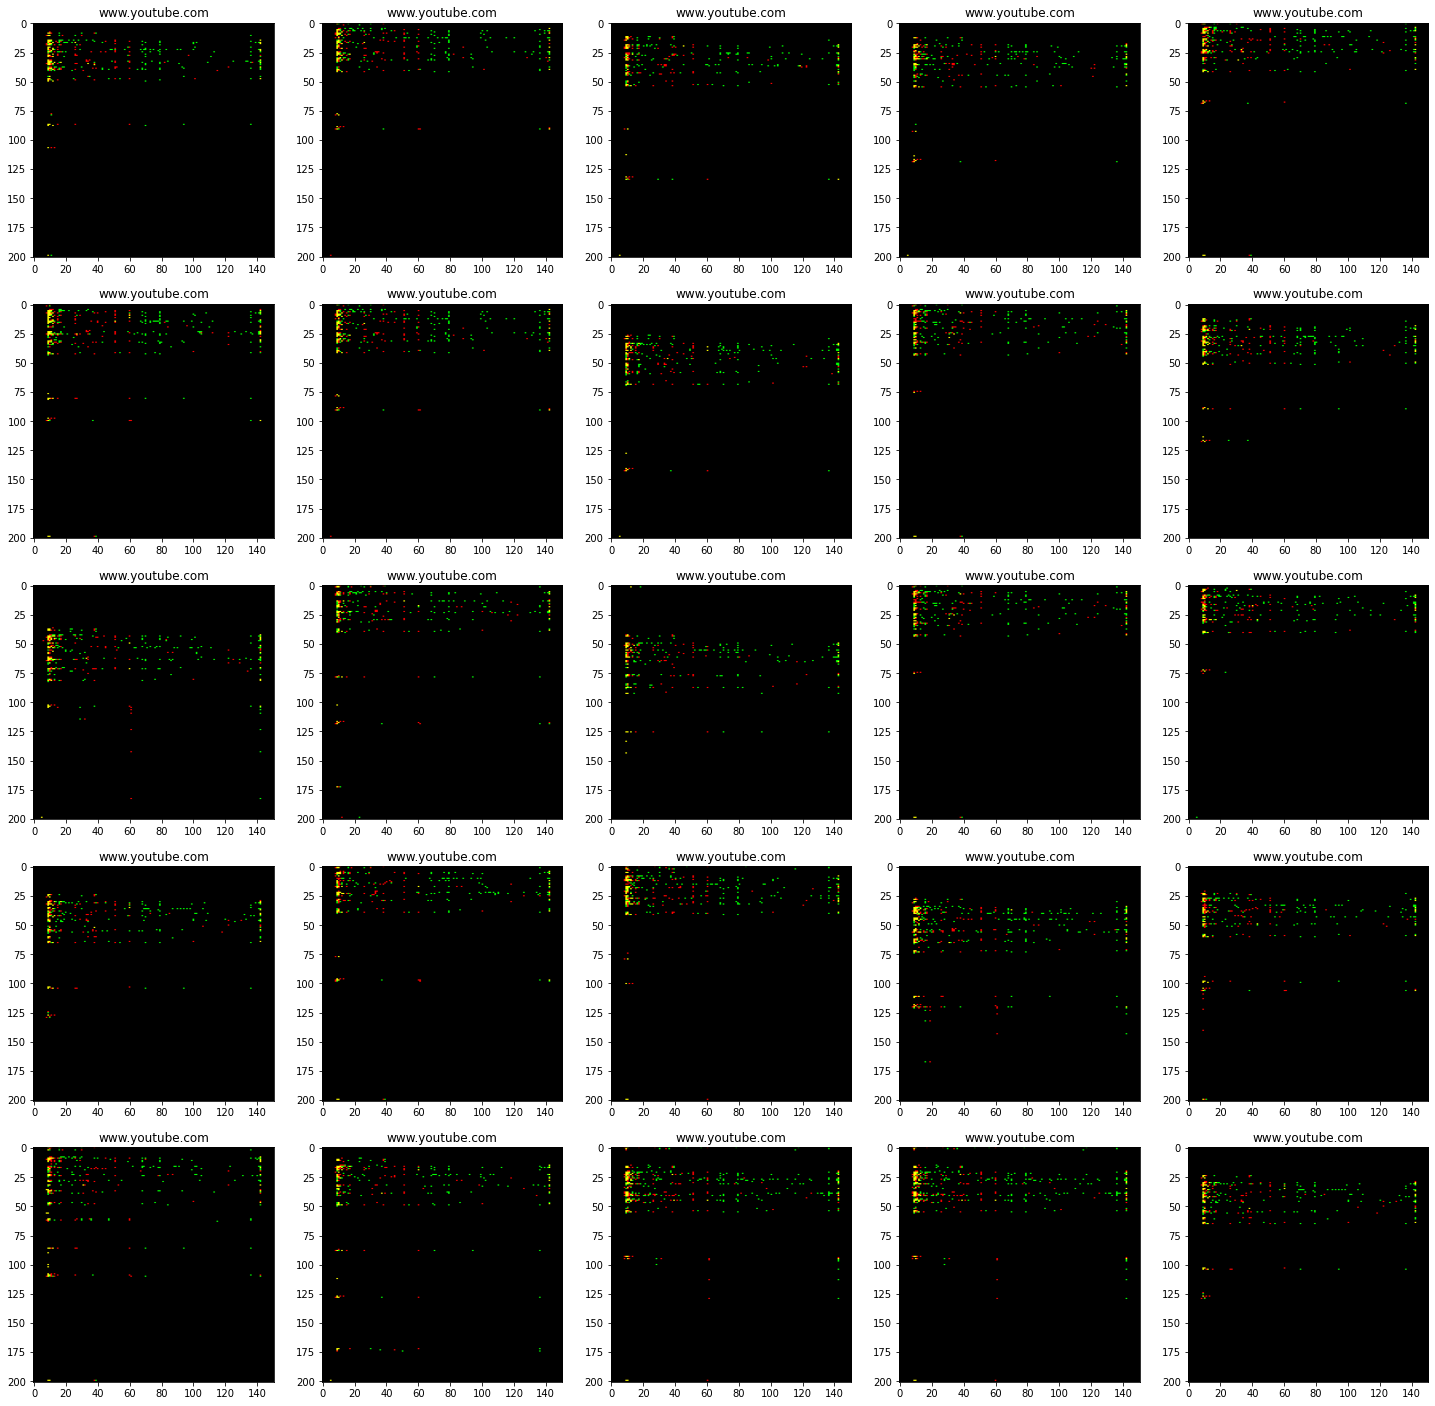

In [11]:
for label in unique_labels:

    indexes = labels_df[labels_df.label == label].index

    plt.figure(figsize=(25,25))

    
    for i in range(25):
        plt.subplot(5, 5, i +1)
        random_idx = random.randint(0, len(indexes) -1)
        plt.imshow(np.pad(features[indexes[random_idx]], (0,1)), aspect="auto")
        plt.title(f"{label}")